<a href="https://colab.research.google.com/github/flaviocaos/Projeto-Deep-Learning---UFPE/blob/main/C%C3%B3pia_de_Projeto_Programa%C3%A7%C3%A3o_Deep_Learning_CIn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de programação - Base de saúde no trabalho remoto

Equipe:

Hiago </br>
João Vitor Santos Tavares </br>
Flávio </br>

**Link para base:** [Remote Work Of Health Impact Survey June 2025](https://www.kaggle.com/datasets/kshitijsaini121/remote-work-of-health-impact-survey-june-2025)

## Perguntas de pesquisa:

1. Qual cargo tem o maior nível de burnout entre os pesquisados?
2. Qual segmento da indústria apresenta maiores níveis de burnout?
2. Qual cargo possui a maior faixa salarial?
3. Dentre a diferentes faixas salariais, qual a que apresenta um melhor equilíbrio entre trabalho e vida pessoal?
4. Qual porção continental apresenta maior incidência de níveis altos de burnout?
5. Qual a proporção da ocorrência de estresse pós traumático (PTSD) entre os cargos? e a de TDAH?
6. Existe alguma correlação entre a idade e a quantidade de horas trabalhadas?

## Download dos arquivos e configurações iniciais

In [ ]:
!curl -L -o ./remote-work-of-health-impact-survey-june-2025.zip https://www.kaggle.com/api/v1/datasets/download/kshitijsaini121/remote-work-of-health-impact-survey-june-2025

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 45354  100 45354    0     0  32837      0  0:00:01  0:00:01 --:--:-- 1507k


In [ ]:
!unzip remote-work-of-health-impact-survey-june-2025.zip

Archive:  remote-work-of-health-impact-survey-june-2025.zip
  inflating: post_pandemic_remote_work_health_impact_2025.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Análise Exploratória

In [ ]:
df: pd.DataFrame = pd.read_csv("./post_pandemic_remote_work_health_impact_2025.csv")

df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

### Analisando as colunas textuais/categóricas

O objetivo desta análise é identificar, dentre as colunas textuais e categórias, qual ou quais necessitam de algum tipo de normalização.

In [ ]:
exploratory_df: pd.DataFrame = df.copy()

In [ ]:
exploratory_df['Physical_Health_Issues'].unique()

array(['Shoulder Pain; Neck Pain', 'Back Pain',
       'Shoulder Pain; Eye Strain', nan, 'Back Pain; Shoulder Pain',
       'Back Pain; Shoulder Pain; Wrist Pain', 'Neck Pain',
       'Shoulder Pain', 'Eye Strain; Wrist Pain', 'Back Pain; Eye Strain',
       'Back Pain; Shoulder Pain; Eye Strain', 'Back Pain; Wrist Pain',
       'Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain', 'Eye Strain',
       'Back Pain; Shoulder Pain; Eye Strain; Neck Pain',
       'Eye Strain; Neck Pain', 'Shoulder Pain; Eye Strain; Wrist Pain',
       'Back Pain; Neck Pain', 'Wrist Pain',
       'Back Pain; Shoulder Pain; Neck Pain',
       'Back Pain; Eye Strain; Neck Pain',
       'Back Pain; Shoulder Pain; Eye Strain; Wrist Pain',
       'Shoulder Pain; Eye Strain; Neck Pain', 'Neck Pain; Wrist Pain',
       'Back Pain; Eye Strain; Neck Pain; Wrist Pain',
       'Back Pain; Eye Strain; Wrist Pain',
       'Back Pain; Neck Pain; Wrist Pain', 'Shoulder Pain; Wrist Pain',
       'Back Pain; Shoulder Pain; Ey

In [ ]:
exploratory_df['Mental_Health_Status'].unique()

array(['Stress Disorder', 'ADHD', nan, 'Burnout', 'Anxiety', 'PTSD',
       'Depression'], dtype=object)

In [ ]:
exploratory_df['Burnout_Level'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [ ]:
exploratory_df['Salary_Range'].unique()

array(['$40K-60K', '$80K-100K', '$60K-80K', '$100K-120K', '$120K+'],
      dtype=object)

In [ ]:
exploratory_df['Job_Role'].unique()

array(['Data Analyst', 'Business Analyst', 'DevOps Engineer',
       'IT Support', 'Technical Writer', 'Software Engineer',
       'HR Manager', 'Project Manager', 'Data Scientist', 'UX Designer',
       'Social Media Manager', 'Digital Marketing Specialist',
       'Account Manager', 'Research Scientist', 'Sales Representative',
       'Operations Manager', 'Customer Service Manager',
       'Product Manager', 'Quality Assurance', 'Executive Assistant',
       'Financial Analyst', 'Marketing Specialist', 'Consultant',
       'Content Writer'], dtype=object)

In [ ]:
exploratory_df['Industry'].unique()

array(['Professional Services', 'Education', 'Manufacturing',
       'Customer Service', 'Technology', 'Finance', 'Retail',
       'Healthcare', 'Marketing'], dtype=object)

In [ ]:
exploratory_df['Region'].unique()

array(['Asia', 'Africa', 'Europe', 'South America', 'Oceania',
       'North America'], dtype=object)

In [ ]:
exploratory_df['Gender'].unique()

array(['Female', 'Male', 'Non-binary', 'Prefer not to say'], dtype=object)

In [ ]:
exploratory_df['Work_Arrangement'].unique()

array(['Onsite', 'Hybrid', 'Remote'], dtype=object)

In [ ]:
exploratory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

### Aplicando transformações/pré-processamento

A maioria das colunas do dataset são textuais e/ou categóricas. Dessa forma, visando facilitar a manipulação dos dados categóricos e reduzir o uso de memória, realizaremos a conversão para o tipo categórico das colunas textuais com exceção de: Job_Role, Mental_Health_Status, Physical_Health_Issues e Region, uma vez que essas colunas representam nomes/substantivos e não categorias.

Além disso, a coluna Physical_Health_Issues apresenta uma padronização errônea, que pode levar a um erro na hora de computar as métricas já que o valor da string "Back pain" será diferente de "Back pain; Shoulder pain" por exemplo.

Por fim, para lidar com valores ausentes, os mesmos serão removidos, uma vez que não representam uma parcela tão grande da amostra. Além disso, o preenchimento de tais valores com uso da moda pode causar algum tipo de viés sob o cálculo das métricas, uma vez que a coluna que apresenta maior quantia de valores ausentes é a coluna de "Mental_Health_Status".

Por se tratar de uma coluna onde os valores são naturalmente complexos não por questões de valor, mas por definição conceitual, faz-se a necessidade de evitar o enviesamento em tal coluna. O mesmo vale para "Physical_Health_Issues".

Desta forma, o fluxo de transformações será:

  1. Remover dados ausentes/NaN.
  2. Converter os valores textuais aplicáveis para o tipo "category".
  3. Aplicar one-hot encoding "Physical_Health_Issues".
  4. Aplicar a ordem no caso de dados categóricos ordinais, como "Burnout_Level".

In [ ]:
# 1. Removendo dados ausentes
transformed_df: pd.DataFrame = df.dropna()

In [ ]:
transformed_df['Gender'] = transformed_df['Gender'].astype('category')

transformed_df['Gender'].cat.categories

/tmp/ipython-input-1811040249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_df['Gender'] = transformed_df['Gender'].astype('category')


Index(['Female', 'Male', 'Non-binary', 'Prefer not to say'], dtype='object')

In [ ]:
transformed_df['Industry'] = transformed_df['Industry'].astype('category')

transformed_df['Industry'].cat.categories

/tmp/ipython-input-3652356810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_df['Industry'] = transformed_df['Industry'].astype('category')


Index(['Customer Service', 'Education', 'Finance', 'Healthcare',
       'Manufacturing', 'Marketing', 'Professional Services', 'Retail',
       'Technology'],
      dtype='object')

In [ ]:
transformed_df['Work_Arrangement'] = transformed_df['Work_Arrangement'].astype('category')

transformed_df['Work_Arrangement'].cat.categories

/tmp/ipython-input-3712228458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_df['Work_Arrangement'] = transformed_df['Work_Arrangement'].astype('category')


Index(['Hybrid', 'Onsite', 'Remote'], dtype='object')

In [ ]:
transformed_df['Salary_Range'] = transformed_df['Salary_Range'].astype('category')

cats = ['$40K-60K', '$60K-80K', '$80K-100K', '$100K-120K', '$120K+']

transformed_df['Salary_Range'] = transformed_df['Salary_Range'].cat.reorder_categories(cats, ordered=True)

transformed_df['Salary_Range'].cat.categories

/tmp/ipython-input-2487134037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_df['Salary_Range'] = transformed_df['Salary_Range'].astype('category')
/tmp/ipython-input-2487134037.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_df['Salary_Range'] = transformed_df['Salary_Range'].cat.reorder_categories(cats, ordered=True)


Index(['$40K-60K', '$60K-80K', '$80K-100K', '$100K-120K', '$120K+'], dtype='object')

In [ ]:
transformed_df['Burnout_Level'] = transformed_df['Burnout_Level'].astype('category')

transformed_df['Burnout_Level'] = transformed_df['Burnout_Level'].cat.reorder_categories(['Low', 'Medium', 'High'], ordered=True)

transformed_df['Burnout_Level'].cat.categories

/tmp/ipython-input-2826826170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_df['Burnout_Level'] = transformed_df['Burnout_Level'].astype('category')
/tmp/ipython-input-2826826170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_df['Burnout_Level'] = transformed_df['Burnout_Level'].cat.reorder_categories(['Low', 'Medium', 'High'], ordered=True)


Index(['Low', 'Medium', 'High'], dtype='object')

In [ ]:
dummies = transformed_df['Physical_Health_Issues'].str.get_dummies(sep='; ')

transformed_df = transformed_df.join(dummies)

transformed_df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Back Pain,Eye Strain,Neck Pain,Shoulder Pain,Wrist Pain
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K,0,0,1,1,0
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K,1,0,0,0,0
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K,0,1,0,1,0
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K,0,1,0,1,0
5,2025-06-01,52,Male,Oceania,Customer Service,Business Analyst,Onsite,61,Burnout,Medium,4,Back Pain; Shoulder Pain,3,$60K-80K,1,0,0,1,0


In [ ]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2150 entries, 0 to 3156
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Survey_Date              2150 non-null   object  
 1   Age                      2150 non-null   int64   
 2   Gender                   2150 non-null   category
 3   Region                   2150 non-null   object  
 4   Industry                 2150 non-null   category
 5   Job_Role                 2150 non-null   object  
 6   Work_Arrangement         2150 non-null   category
 7   Hours_Per_Week           2150 non-null   int64   
 8   Mental_Health_Status     2150 non-null   object  
 9   Burnout_Level            2150 non-null   category
 10  Work_Life_Balance_Score  2150 non-null   int64   
 11  Physical_Health_Issues   2150 non-null   object  
 12  Social_Isolation_Score   2150 non-null   int64   
 13  Salary_Range             2150 non-null   category
 14  Back Pain    

In [ ]:
transformed_df.to_csv('./remote_work_health_transformed.csv', index=False)

## Análise exploratória

/tmp/ipython-input-1926074572.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


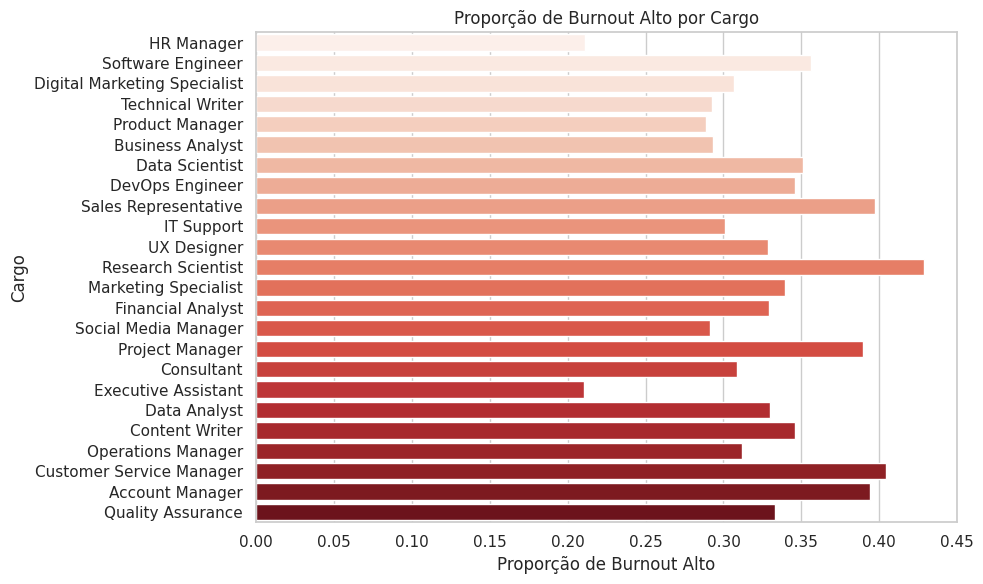

/tmp/ipython-input-1926074572.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_industry = transformed_df.groupby("Industry")["Burnout_Level"].apply(lambda x: (x == "High").mean()).sort_values(ascending=False).index
/tmp/ipython-input-1926074572.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x=transformed_df.groupby("Industry")["Burnout_Level"].apply(lambda x: (x == "High").mean()),
/tmp/ipython-input-1926074572.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effe

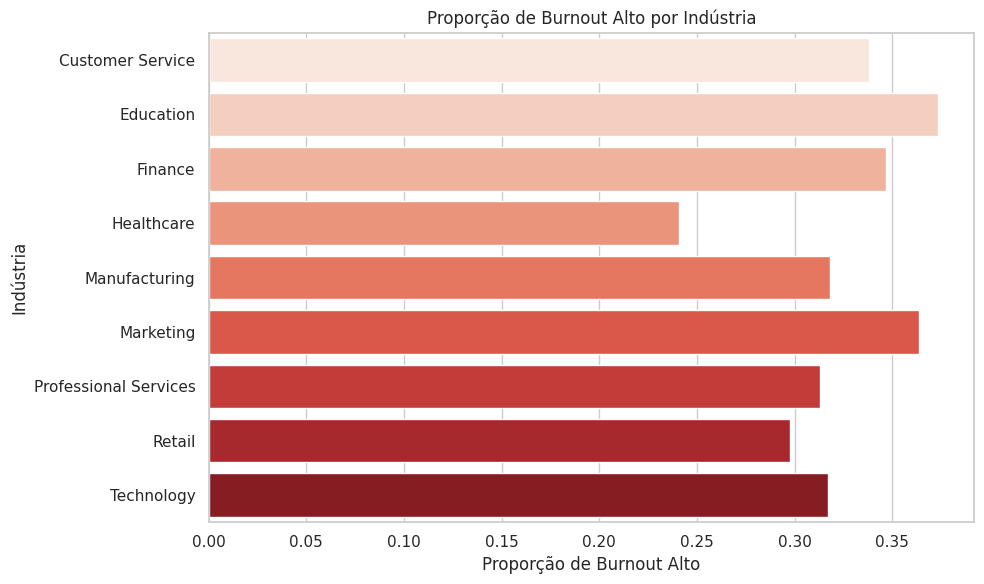

/tmp/ipython-input-1926074572.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


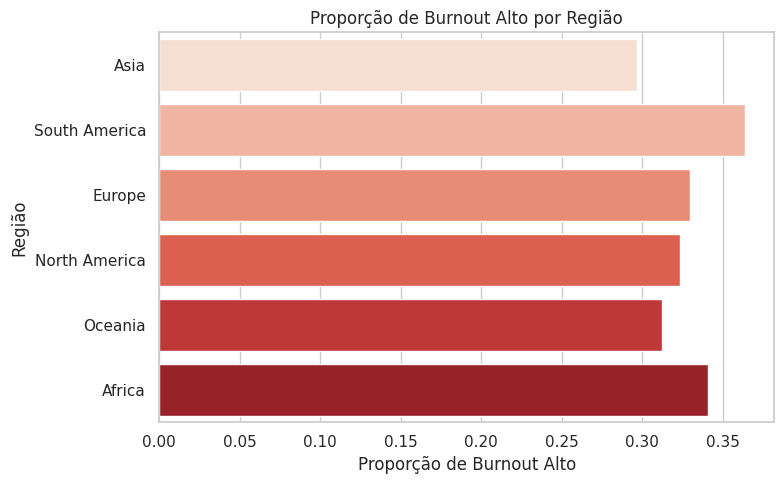

/tmp/ipython-input-1926074572.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


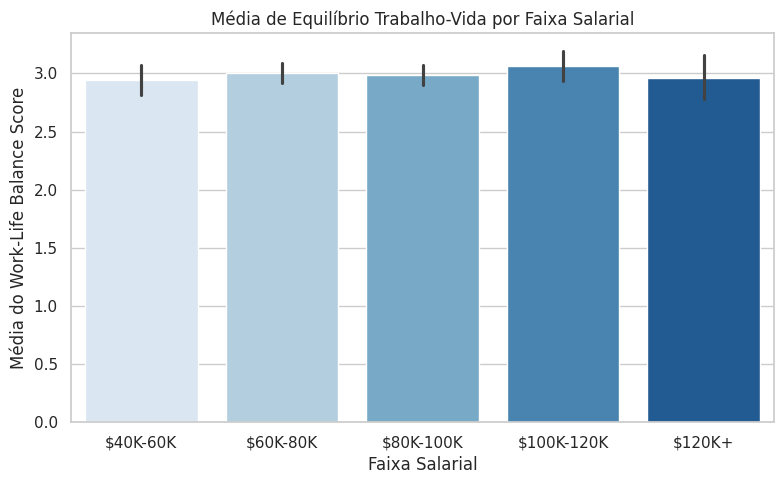

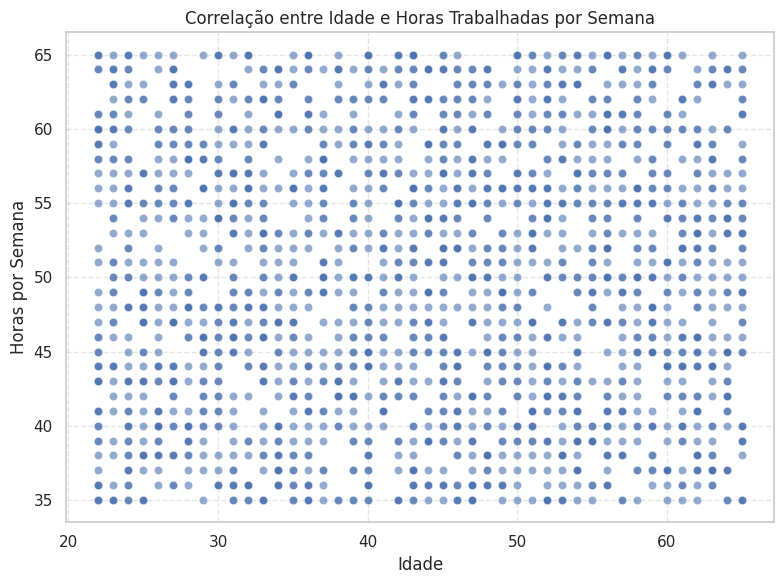

Correlação de Pearson entre idade e horas/semana: 0.01


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams.update({"figure.autolayout": True})

# 1. Cargo com maior nível de burnout
plt.figure(figsize=(10,6))
order_job = transformed_df.groupby("Job_Role")["Burnout_Level"].apply(lambda x: (x == "High").mean()).sort_values(ascending=False).index
sns.barplot(
    x=transformed_df.groupby("Job_Role")["Burnout_Level"].apply(lambda x: (x == "High").mean()),
    y=order_job,
    palette="Reds"
)
plt.title("Proporção de Burnout Alto por Cargo")
plt.xlabel("Proporção de Burnout Alto")
plt.ylabel("Cargo")
plt.savefig("grafico1_burnout_cargo.png", dpi=300)
plt.show()

# 2. Segmento da indústria com maiores níveis de burnout
plt.figure(figsize=(10,6))
order_industry = transformed_df.groupby("Industry")["Burnout_Level"].apply(lambda x: (x == "High").mean()).sort_values(ascending=False).index
sns.barplot(
    x=transformed_df.groupby("Industry")["Burnout_Level"].apply(lambda x: (x == "High").mean()),
    y=order_industry,
    palette="Reds"
)
plt.title("Proporção de Burnout Alto por Indústria")
plt.xlabel("Proporção de Burnout Alto")
plt.ylabel("Indústria")
plt.savefig("grafico2_burnout_industria.png", dpi=300)
plt.show()

# 3. Porção continental com maior incidência de burnout alto
plt.figure(figsize=(8,5))
order_region = transformed_df.groupby("Region")["Burnout_Level"].apply(lambda x: (x == "High").mean()).sort_values(ascending=False).index
sns.barplot(
    x=transformed_df.groupby("Region")["Burnout_Level"].apply(lambda x: (x == "High").mean()),
    y=order_region,
    palette="Reds"
)
plt.title("Proporção de Burnout Alto por Região")
plt.xlabel("Proporção de Burnout Alto")
plt.ylabel("Região")
plt.savefig("grafico3_burnout_regiao.png", dpi=300)
plt.show()

# 4. Faixa salarial com melhor equilíbrio trabalho-vida
plt.figure(figsize=(8,5))
sns.barplot(
    x="Salary_Range",
    y="Work_Life_Balance_Score",
    data=transformed_df,
    order=transformed_df["Salary_Range"].cat.categories,
    palette="Blues"
)
plt.title("Média de Equilíbrio Trabalho-Vida por Faixa Salarial")
plt.xlabel("Faixa Salarial")
plt.ylabel("Média do Work-Life Balance Score")
plt.savefig("grafico4_worklife_salario.png", dpi=300)
plt.show()

# 5. Correlação idade vs horas trabalhadas
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Age",
    y="Hours_Per_Week",
    data=transformed_df,
    alpha=0.6
)
plt.title("Correlação entre Idade e Horas Trabalhadas por Semana")
plt.xlabel("Idade")
plt.ylabel("Horas por Semana")
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("grafico5_idade_horas.png", dpi=300)
plt.show()

# Valor da correlação
corr_val = transformed_df["Age"].corr(transformed_df["Hours_Per_Week"])
print(f"Correlação de Pearson entre idade e horas/semana: {corr_val:.2f}")
